## Mushroom dataset with ML
Dataset from https://www.kaggle.com/datasets/ulrikthygepedersen/mushroom-attributes.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'1.2.1'

In [ ]:
mushrooms = pd.read_csv(r'/content/sample_data/mushroom.csv')
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [ ]:
mushrooms.shape

(8124, 23)

In [ ]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
mushrooms_df = mushrooms.drop('class', axis=1)
mushrooms_df.shape

(8124, 22)

In [ ]:
mushrooms_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b's',b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b's',b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b's',b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b's',b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b's',b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g'


##### Extracting information to predict - 1 if mushroom is mushroom eatable, else 0

In [ ]:
mushroom_class = mushrooms['class']
mushroom_class.head()

0    b'p'
1    b'e'
2    b'e'
3    b'p'
4    b'e'
Name: class, dtype: object

In [ ]:
is_edible = pd.Series(np.where(mushroom_class == "b'e'", 1, 0))
is_edible

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Length: 8124, dtype: int64

##### Preparing other values

In [ ]:
columns = mushrooms_df.columns
columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
for column in columns:
  print(column)
  unique_values = mushrooms_df[column].unique()
  print(unique_values)

cap-shape
["b'x'" "b'b'" "b's'" "b'f'" "b'k'" "b'c'"]
cap-surface
["b's'" "b'y'" "b'f'" "b'g'"]
cap-color
["b'n'" "b'y'" "b'w'" "b'g'" "b'e'" "b'p'" "b'b'" "b'u'" "b'c'" "b'r'"]
bruises%3F
["b't'" "b'f'"]
odor
["b'p'" "b'a'" "b'l'" "b'n'" "b'f'" "b'c'" "b'y'" "b's'" "b'm'"]
gill-attachment
["b'f'" "b'a'"]
gill-spacing
["b'c'" "b'w'"]
gill-size
["b'n'" "b'b'"]
gill-color
["b'k'" "b'n'" "b'g'" "b'p'" "b'w'" "b'h'" "b'u'" "b'e'" "b'b'" "b'r'"
 "b'y'" "b'o'"]
stalk-shape
["b'e'" "b't'"]
stalk-root
["b'e'" "b'c'" "b'b'" "b'r'" "b'?'"]
stalk-surface-above-ring
["b's'" "b'f'" "b'k'" "b'y'"]
stalk-surface-below-ring
["b's'" "b'f'" "b'y'" "b'k'"]
stalk-color-above-ring
["b'w'" "b'g'" "b'p'" "b'n'" "b'b'" "b'e'" "b'o'" "b'c'" "b'y'"]
stalk-color-below-ring
["b'w'" "b'p'" "b'g'" "b'b'" "b'n'" "b'e'" "b'y'" "b'o'" "b'c'"]
veil-type
["b'p'"]
veil-color
["b'w'" "b'n'" "b'o'" "b'y'"]
ring-number
["b'o'" "b't'" "b'n'"]
ring-type
["b'p'" "b'e'" "b'l'" "b'f'" "b'n'"]
spore-print-color
["b'k'" "b'n'" "b'

In [ ]:
# 'veil-type' has only one value so I can delte it.
mushrooms_df = mushrooms_df.drop('veil-type', axis=1)
columns = mushrooms_df.columns
columns.size

21

In [ ]:
X = pd.DataFrame()

In [ ]:
# columns 'bruises%3F', 'stalk-shape', 'gill-attachment' and 'gill-size' have only two posible values, so they can be easily converted to bninary columns

X['bruises'] = pd.Series(np.where(mushrooms_df['bruises%3F'] == "b't'", 1, 0))
X.shape

(8124, 1)

In [ ]:
X

,bruises
0,1
1,1
2,1
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,0


In [ ]:
X['enlarging-stalk'] = pd.Series(np.where(mushrooms_df['stalk-shape' ] == "b'e'", 1, 0))
X['broad-gill'] = pd.Series(np.where(mushrooms_df['gill-size'] == "b'b'", 1, 0))
X['gill-attached'] = pd.Series(np.where(mushrooms_df['gill-attachment'] == "b'a'", 1, 0))
X.head()

,bruises,enlarging-stalk,broad-gill,gill-attached
0,1,1,0,0
1,1,1,1,0
2,1,1,1,0
3,1,1,0,0
4,0,0,1,0


In [ ]:
mushrooms_df = mushrooms_df.drop(['bruises%3F', 'stalk-shape', 'gill-attachment', 'gill-size'], axis=1)
mushrooms_df.shape

(8124, 17)

In [ ]:
"b'x'"[2]

'x'

In [ ]:
columns = mushrooms_df.columns
columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-spacing',
       'gill-color', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
for column in columns:
  unique_values = mushrooms_df[column].unique()
  for value in unique_values:
    new_name = column + '-' + value[2]
    X[new_name] = pd.Series(np.where(mushrooms_df[column] == value, 1, 0))

X.head()

<ipython-input-19-6326351c1550>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[new_name] = pd.Series(np.where(mushrooms_df[column] == value, 1, 0))


,bruises,enlarging-stalk,broad-gill,gill-attached,cap-shape-x,cap-shape-b,cap-shape-s,cap-shape-f,cap-shape-k,cap-shape-c,...,population-v,population-y,population-c,habitat-u,habitat-g,habitat-m,habitat-d,habitat-p,habitat-w,habitat-l
0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X.shape

(8124, 112)

In [ ]:
y = is_edible

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (6093, 112)
y_train shape:  (6093,)
X_test shape:  (2031, 112)
y_test shape:  (2031,)


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[5.67682472e-04, 9.99432318e-01],
       [1.49349084e-03, 9.98506509e-01],
       [4.43368268e-04, 9.99556632e-01],
       ...,
       [9.99493318e-01, 5.06682341e-04],
       [9.25292994e-04, 9.99074707e-01],
       [3.54384681e-05, 9.99964562e-01]])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_test

2406    1
1907    1
2751    1
7548    1
4423    0
       ..
4831    1
2605    0
6078    0
519     1
1978    1
Length: 2031, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  1.0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

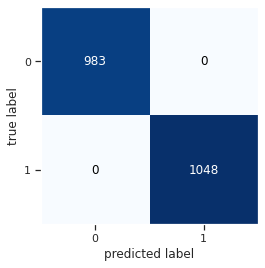

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

##### Trying to explain it

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 21.3 MB/s eta 0:00:00


In [ ]:
import shap

shap.initjs()

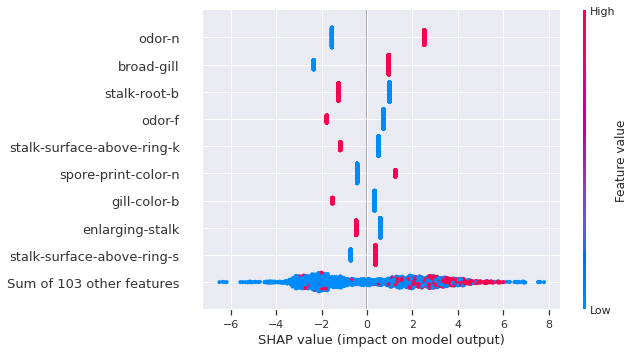

In [ ]:
explainer = shap.Explainer(classifier, X_train, feature_names=columns)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

In [ ]:
shap_values

.values =
array([[ 0.01210284,  0.58473103,  0.95814297, ..., -0.0543691 ,
        -0.04741773,  0.01388021],
       [ 0.01210284,  0.58473103,  0.95814297, ..., -0.0543691 ,
        -0.04741773,  0.01388021],
       [ 0.01210284,  0.58473103,  0.95814297, ..., -0.0543691 ,
        -0.04741773,  0.01388021],
       ...,
       [-0.00913021,  0.58473103, -2.34579831, ...,  0.24768147,
        -0.04741773,  0.01388021],
       [ 0.01210284, -0.4784163 ,  0.95814297, ..., -0.0543691 ,
        -0.04741773,  0.01388021],
       [-0.00913021,  0.58473103,  0.95814297, ..., -0.0543691 ,
        -0.04741773,  0.01388021]])

.base_values =
array([-0.45886482, -0.45886482, -0.45886482, ..., -0.45886482,
       -0.45886482, -0.45886482])

.data =
array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
shap_values.values.shape

(2031, 112)

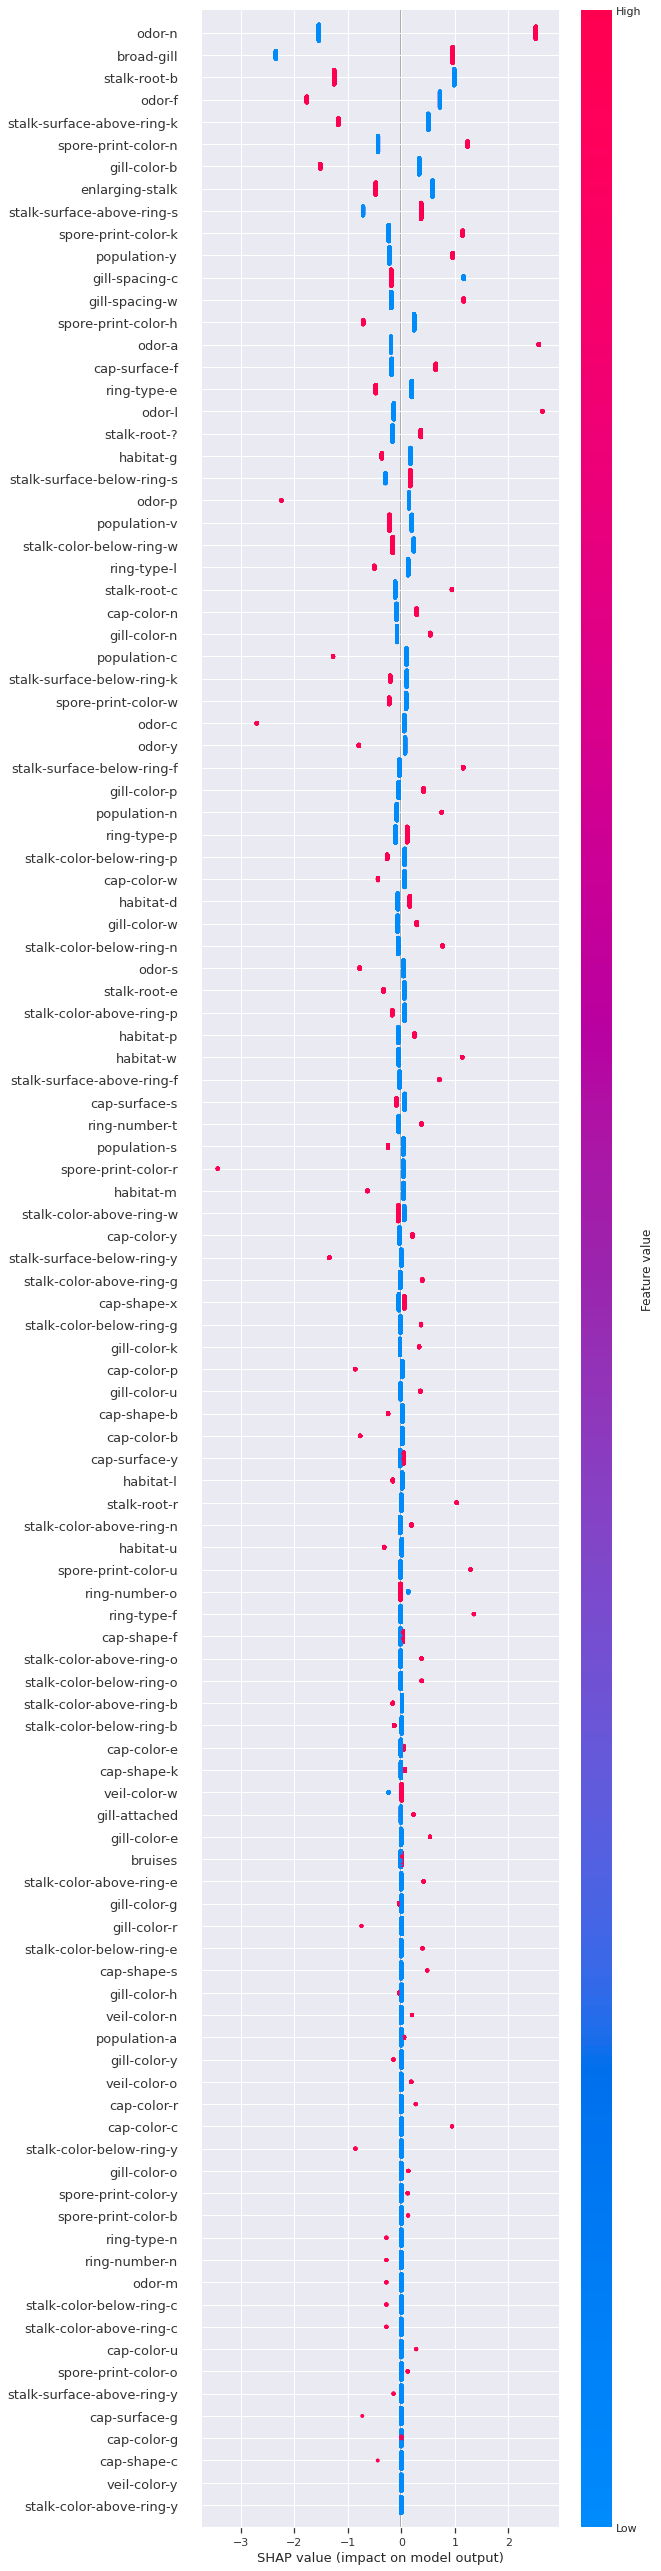

In [ ]:
shap.plots.beeswarm(shap_values, max_display=120)

In [ ]:
X["is_edible"] = y

In [ ]:
X.to_csv('mushrooms_processed.csv')